In [25]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family = font_name)
import pandas as pd
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

특성 공학 : 특정 애플리케이션에 가장 적합한 데이터 표현을 찾는것 

데이터 과학자와 머신러닝 기술자가 실제 문제를 풀기 위해 당면하는 주요 작업중 하나이다.

올바른 데이터 표현은 지도 학습 모델에서 적절한 매개변수를 선택하는 것보다 성능에 더 큰 영향을 미친다.

< 원-핫-인코딩(가변수) >



범주형 변수를 표현하는데 가장 널리 쓰이는 방법은 원-핫-인코딩(one-hot-encoding)이다.

이를 원-아웃-오브-엔-인코딩 혹은 가변수라고도 한다.



가변수는 범주형 변수를 0또는 1값을 가진 하나 이상의 새로운 특성으로 바꾼것이다.



0과 1로 표현된 변수는 선령 이진 분류공식에 적용할 수 있어서 다음과 같이 개수에 상관없이 범주마다 하나의 특성으로 표현한다.





예제에 사용할 데이터셋은 ​1994년  인구조사 데이터 베이스에서 추출한 미국 성인의 소득 데이터셋이다.



이 데이터셋에는 근로자 나이(age), 고용 형태(workclass), 교육 수준(education), 성별(gender), 주당 근로시간(hours-per-week), 직업(occupation)등의 특성이 있다.

In [3]:
%matplotlib inline
from preamble import *

In C:\Users\A\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\A\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\A\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\A\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\A\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [4]:
import os
# 이 파일은 열 이름을 나타내는 헤더가 없으므로 header=None으로 지정하고
# "names" 매개변수로 열 이름을 제공합니다
data = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, "adult.data"), header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
# 예제를 위해 몇개의 열만 선택합니다
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]
# IPython.display 함수는 주피터 노트북을 위해 포맷팅된 출력을 만듭니다
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [5]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


pandas에서는 get_dummies 함수를 사용해 데이터를 매우 쉽게 인코딩할 수 있다.
get_dummies 함수는 객체 타입이나 범주형을 가진 열을 자동으로 변환해준다.

In [6]:
print("원본 특성: \n",list(data.columns),"\n")

# 원본 특성: 
#  ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 
data_dummies = pd.get_dummies(data)
print("get_dummies  후의 특성: \n",list(data_dummies.columns),"\n")

원본 특성: 
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

get_dummies  후의 특성: 
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupatio

연속형 특성인 age와 hours-per-week는 그대로지만 범주형 특성은 값마다 새로운 특성으로 확장되었다.

In [7]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,...,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,...,0,0,1,0
1,50,13,0,0,...,0,0,1,0
2,38,40,0,0,...,0,0,1,0
3,53,40,0,0,...,0,0,1,0
4,28,40,0,0,...,0,0,1,0


data_dummies의 values 속성을 이용해 DataFrame을 NumPy 배열로 바꿀 수 있으며, 이를 이용해 머신러닝 모델을 학습시킨다.
모델을 학습 시키기 전에 이 데이터로부터 타깃값을 분리해야 한다.
출력값이나 출력값으로부터 유도된 변수를 특성 표현에 포함하는 것은 지도 학습 모델을 만들 때 특히 저지르기 쉬운 실수이다.

[주의]
pandas에서 열 인덱싱은 범위 끝을 포함한다.
NumPy 배열의 슬라이싱은 마지막 범위를 포함하지 않는다.
 예를 들어 np.arange(11)[0:10]은 인텍스 10인 항목을 포함하지 않는다.

여기서는 특성을 포함한 열, 즉 age부터 occupation_ Transport-moving까지 모든 열을 추출한다.
이 범위에는 타깃을 뺀 모든 특성이 포함된다.

In [8]:
features = data_dummies.loc[:,'age':'occupation_ Transport-moving']
# NumPy 배열 추출
X = features.values
y = data_dummies['income_ <=50K'].values
print("X.shape : {}  y.shape : {}".format(X.shape,y.shape))

X.shape : (32561, 44)  y.shape : (32561,)


이제 데이터가 scikit-learn에서 사용할 수 있는 형태가 되었으므로, 이전과 같은 방식을 사용할 수 있다.

In [9]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print("테스트 점수 : {:.2f}".format(logreg.score(X_train,y_train)))

테스트 점수 : 0.81


C:\Users\A\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


< 숫자로 표현된 범주형 특성 >


인구조사 데이터가 설문지를 통해 얻었다고 한다면,



주관식으로 직업을 직접 쓸 수도 있지만,

보통은 1. 공무원 2. 직장인 3. 자영업자 와 같이 번호로 체크를 한다.



이런 경우 결과값은 "변호사"와 같은 문자열이 아니라 0,1,2,의 값들은 숫자열로 채워진다.

In [10]:
demo_df = pd.DataFrame({'숫자 특성':[0, 1, 2, 1], '범주형 특성':['양말', '여우', '양말', '상자']})
display(demo_df) 

,숫자 특성,범주형 특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


In [11]:
# get_dummies를 사용하면 문자열 특성만 인코딩 되며 숫자 특성은 바뀌지 않는다.
display(pd.get_dummies(demo_df))

,숫자 특성,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


숫자 특성'도 가변수로 만들고 싶다면 columns 매개변수에 인코딩하고 싶은 열을 명시해야 한다.
그러면 두 특성을 모두 범주형으로 간주한다.

In [12]:
demo_df['숫자 특성'] = demo_df['숫자 특성'].astype(str)
demo_df_1=pd.get_dummies(demo_df, columns=['숫자 특성', '범주형 특성'])
demo_df_1

,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


In [13]:
demo_df

,숫자 특성,범주형 특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


In [14]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False)
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


In [15]:
print(ohe.get_feature_names())

['x0_0' 'x0_1' 'x0_2' 'x1_상자' 'x1_양말' 'x1_여우']


< 구간 분할, 이산화 그리고 선형 모델, 트리 모델 >

데이터를 가장 잘 표현하는 방법은 데이터가 가진 의미뿐 아니라 

어떤 모델을 사용하는지에 따라 다르다.

아주 폭넓게 사용하는 두 알고리즘인 선형 모델과 트리 기반 모델은 특성의 표현 방식으로 인해 미치는 영향이 매우 다르다.

In [1]:
import matplotlib.pyplot as plt
import mglearn
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# 데이터셋 가져오기
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

In C:\Users\A\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\A\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\A\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\A\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\A\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


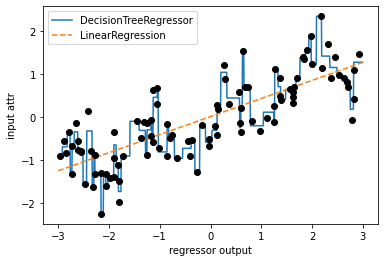

In [2]:
reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="DecisionTreeRegressor")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), '--', label="LinearRegression")

plt.plot(X[:, 0], y, 'o', c='k')
plt.xlabel("regressor output")
plt.ylabel("input attr")
plt.legend(loc='best')
plt.show()

In [7]:
len(reg.predict(line))

1000

선형 모델은 선형 관계로만 모델링하므로 특성이 하나일 땐 직선으로 나타낸다.
결정 트리는 이 데이터로 훨씬 볻잡한 모델을 만들 수 있다.
그러나 이는 데이터의 표현 형태에 따라 달라진다.

연속형 데이터에 아주 강력한 선형 모델을 만드는 방법은 한 특성을 여러 특성으로 나누는 구간 분할이다.(이산화)

In [19]:
bins = np.linspace(-3, 3, 11)
print("bins: {}".format(bins))

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


첫번째 구간은 -3~-2.4까지인 모든 데이터 포인트를 담는다.
np.digitize 함수를 사용하면 어느구간에 속하는지 간단하게 계산할 수 있다.

In [20]:
which_bin = np.digitize(X, bins=bins)

print("\n데이터 포인트:\n", X[:5])
print("\n데이터 포인트의 소속 구간:\n", which_bin[:5])


데이터 포인트:
 [[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]]

데이터 포인트의 소속 구간:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


이렇게 함으로써 wave 데이터셋에 있는 연속형 특성을 각 데이터 포인트가 어느 구간에 속했는지로 인코딩한 범주형 특성으로 변환하였다.
이 데이터에 scikit-learn 모델을 적용하기 위해 preprocession 모듈의 OneHotEncoder로 이산적인 이 특성을 원-핫-인코딩으로 변환한다.
OneHotEncoder는 pandas.get_dummies와 같지만 현재는 숫자로된 범주형 변수에만 적용할 수 있다.

In [21]:
from sklearn.preprocessing import OneHotEncoder



# 변환을 위해 OneHotEncoder를 사용합니다

encoder = OneHotEncoder(sparse=False)



# encoder.fit은 which_bin에 나타난 유일한 값을 찾습니다

encoder.fit(which_bin)
# 원-핫-인코딩으로 변환합니다
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


구간을 10개로 정의했기 때문에 변환된 데이터셋 X_binned는 10개의 특성으로 구성된다.

In [22]:
print("X_binned.shape: {}".format(X_binned.shape))

X_binned.shape: (100, 10)


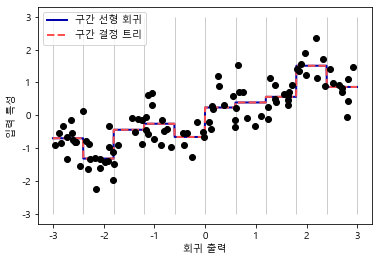

In [26]:
line_binned = encoder.transform(np.digitize(line, bins=bins))
reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='구간 선형 회귀')
reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), '--', label='구간 결정 트리')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.xlabel("회귀 출력")
plt.ylabel("입력 특성")
plt.show()

선형 회귀 모델과 결정 트리가 같은 예측을 만들어내서 파선과 실선이 완전히 겹쳐졌다.

구간별로 이 두 모델이 예측한 것은 상수값이다.
각 구간 안에서 특성의 값이 상수이므로, 어떤 모델이든 그 구간의 포인트에 대해서는 같은 값을 예측할 것이다.
각 구간에서 다른 값을 가지고 있으므로 선형 모델이 훨씬 유연해졌다.

반면에 결정 트리는 덜 유연해졌다.
트리모델은 데이터를 자유롭게 나눠 학습 할 수 있으므로 특성의 값을 구간으로 나누는 것이 아무런 득이 되지 않는다 .

일부 특성과 출력이 비선형 관계이지만, 용량이 매우 크고 고차원 데이터셋이라 선형 모델을 사용한다면, 구간 분할이 모델 성능을 높이는 데 아주 좋은 방법이 될 수 있다.